# Gorjeta
Definir o valor da gorjeta em um restaurante com base na qualidade do serviço e comida.

## Entradas
- Qualidade da Comida
    - Universo : 0 a 10
    - Conjunto Difuso : Péssima, Comível e Deliciosa
- Qualidade do Serviço
    - Universo : 0 a 10
    - Conjunto Difuso : Ruim, Aceitável e Excelente

## Saida
- Gorjeta
    - Universo : 0 a 25%
    - Conjunto Difuso : Baixa, Média e Alta

## Regras de Decisão
- SE o serviço foi excelente ou a comida estava deliciosa ENTAO a gorjeta deve ser alta.
- SE o serviço foi aceitável ENTAO a gorjeta deve ser média
- SE o serviço foi ruim E a comida estava péssima ENTAO a gorjeta deve ser baixa

In [1]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.5 MB/s eta 0:00:00


In [2]:
# Fuzzificação
food = ctrl.Antecedent(np.arange(0, 11, 1), 'food')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

food.automf(names=['terrible', 'eatable', 'delicious'])

service['bad'] = fuzz.trimf(service.universe, [0,0,5]) # Triangular
service['acceptable'] = fuzz.gaussmf(service.universe, 5,2) # Gauseniana
service['excelent'] = fuzz.gaussmf(service.universe, 10,3)

tip['low'] = fuzz.trimf(tip.universe, [0,0,13])
tip['medium'] = fuzz.trapmf(tip.universe, [0,13,15,25]) # Trapezio
tip['high'] = fuzz.trimf(tip.universe, [15,25,25])

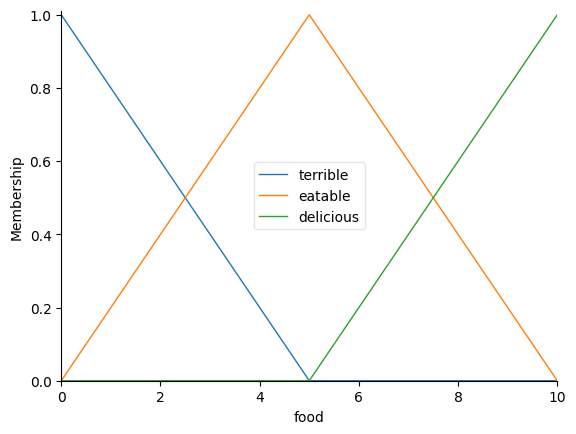

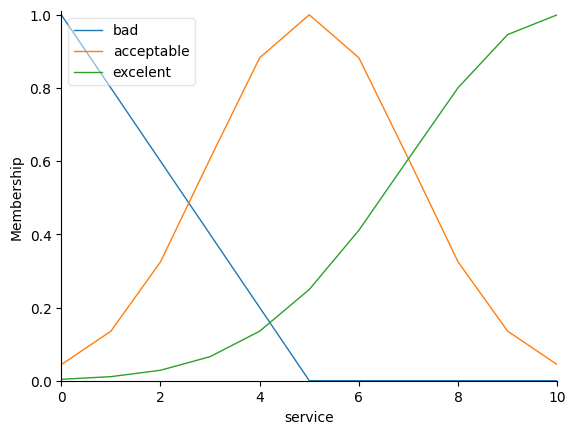

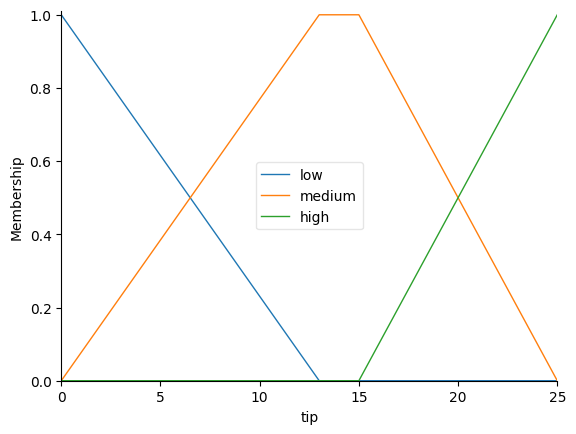

In [3]:
food.view()
service.view()
tip.view()

In [4]:
rule1 = ctrl.Rule(service['excelent'] | food['delicious'], tip['high'])
rule2 = ctrl.Rule(service['acceptable'], tip['medium'])
rule3 = ctrl.Rule(service['bad'] & food['terrible'], tip['low'])

In [5]:
tip_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tip_simulator = ctrl.ControlSystemSimulation(tip_ctrl)

In [6]:
# Entrada de Dados - User
tip_simulator.input['food'] = 3.5
tip_simulator.input['service'] = 1.4
tip_simulator.compute()
print(tip_simulator.output['tip'])

10.961981539773179


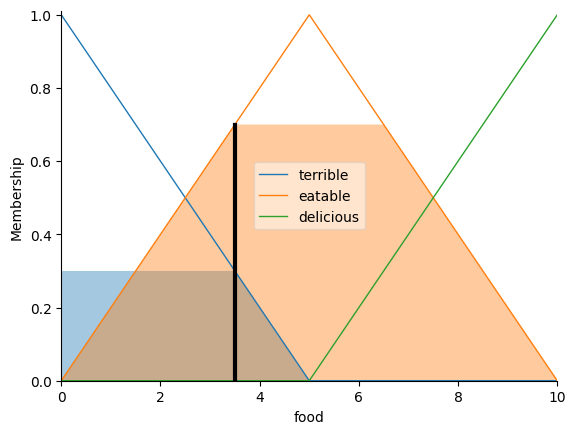

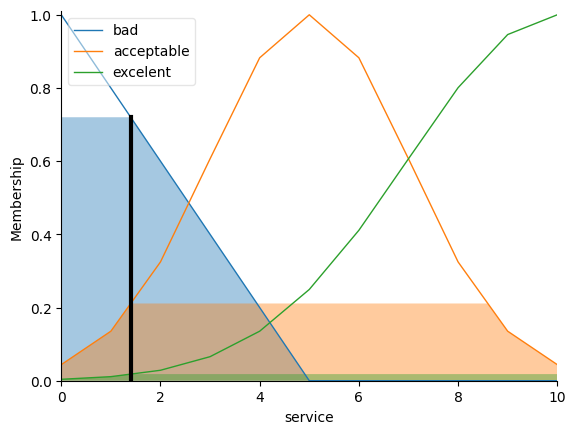

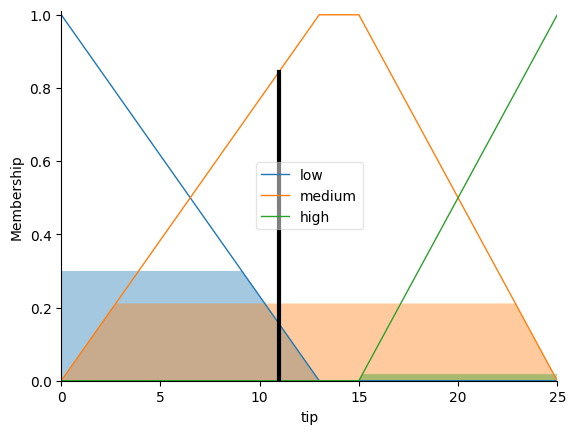

In [7]:
food.view(sim=tip_simulator)
service.view(sim=tip_simulator)
tip.view(sim=tip_simulator)

O conjunto de regras está um pouco vago, mas funcionam bem.
Poderia ser mais explicativo, com comentarios do código ou blocos de texto destacando e explicando as etapas.